In [19]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [20]:
#Import data into Python

titanic_df = pd.read_csv("train.csv")

In [21]:
#Preview dataframe

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#View info for dataframe

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
#Questions to Answer

#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?
#5.) What factors helped someone survive the sinking?

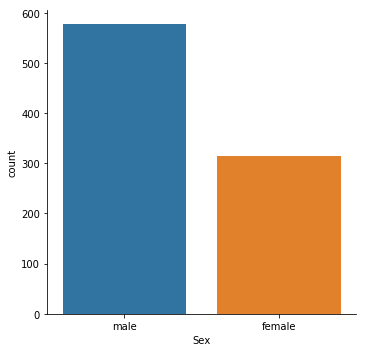

In [29]:
#Q1: Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

#Check the gender
#Use Seaborn to create a factorplot
#Which allows me to pass a column and indicate where the data is coming from

sns.catplot(x='Sex',kind='count',data=titanic_df)

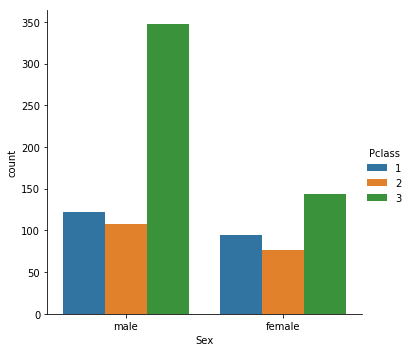

In [33]:
#Separate the genders by classes via Hue

sns.catplot(x='Sex',hue='Pclass',kind='count',data=titanic_df)

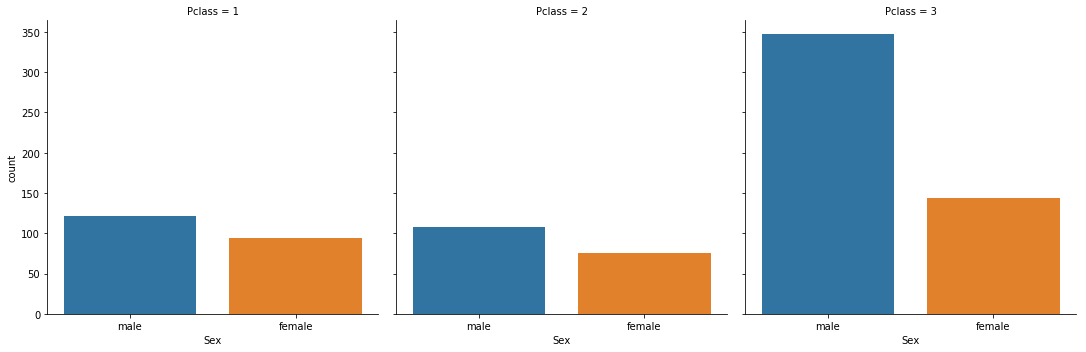

In [34]:
#Separate the genders by classes via Kind

sns.catplot(x='Sex',col='Pclass',kind='count',data=titanic_df)

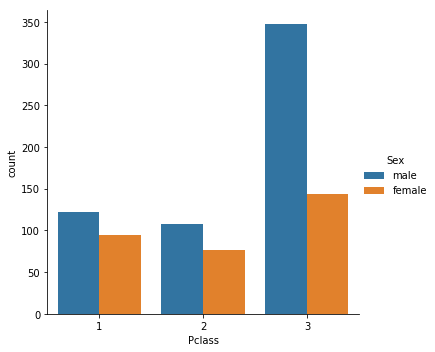

In [35]:
#Separate the class by sex via Kind

sns.catplot(x='Pclass',hue='Sex',kind='count',data=titanic_df)

In [36]:
#Use Apply technique to find # of children

#Create a Function to sort through the sex 
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [37]:
#Define a new column titled 'Person'
#By grabbing age and sex column values and apply function above

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [38]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


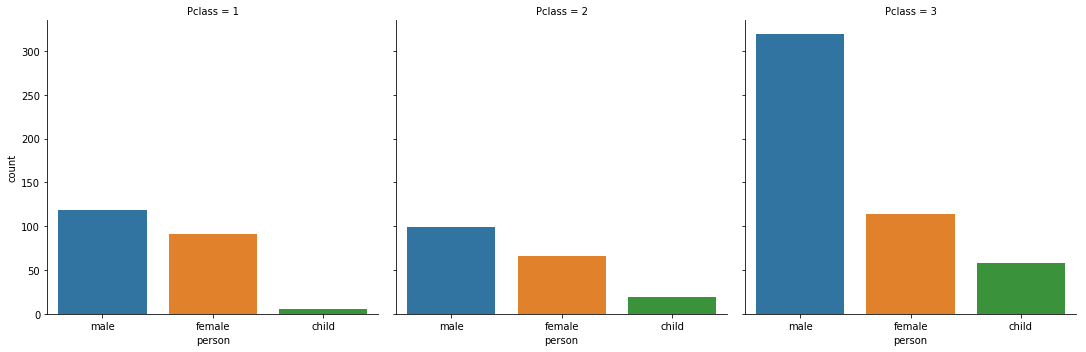

In [40]:
#Create another factor plot for person column

sns.catplot(x='person',col='Pclass', kind='count',data=titanic_df)

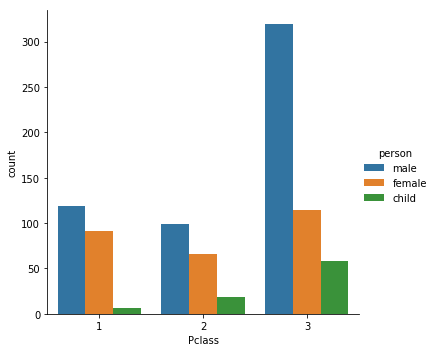

In [47]:
sns.catplot(x='Pclass',data=titanic_df,hue='person',kind='count')

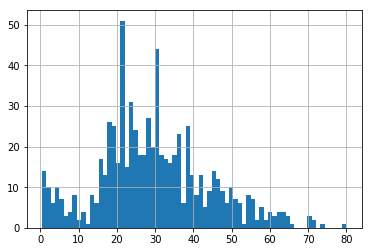

In [50]:
#Create Histogram for Age

titanic_df['Age'].hist(bins=70)

In [56]:
#Mean Age

titanic_df['Age'].mean()

29.69911764705882

In [52]:
#Comparison of male v. female v. child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

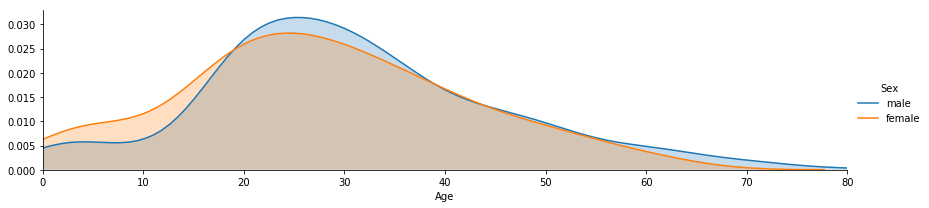

In [77]:
# Facet Grid allows me to plot multiple plots (KDE-distribution plots)

# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.

# Create an object called Figure
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)


# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True).add_legend()

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

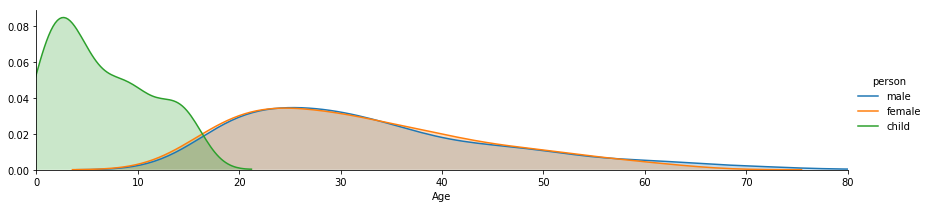

In [76]:
# Create another chart displaying the distribution for each value in person column

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True).add_legend()

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

#KDE plot goes past 16 mark for children because of the bandwidth

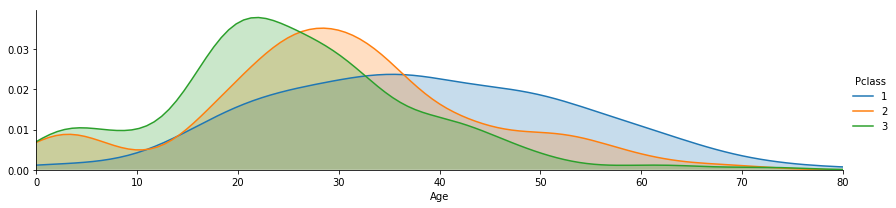

In [78]:
# Create another chart displaying the distribution for each value in Pclass column
# View how ages range by class

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True).add_legend()

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

In [79]:
#Q2: What deck were the passengers on and how does that relate to their class?


In [80]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [81]:
# Drop NaN Cabin values

# Create a new object with 'Cabin' column and Null values droped
deck=titanic_df['Cabin'].dropna()

In [82]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [83]:
#we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

#let's grab that letter for the deck level with a simple for loop

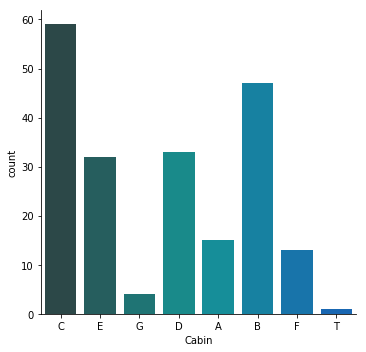

In [85]:
#Set empty levels

levels = []

#Take the first letter in deck object and append to levels list

for level in deck:
    levels.append(level[0])
    
# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df, kind='count',palette='winter_d')

# Provide a bar plot of all cabins and how many people were in each

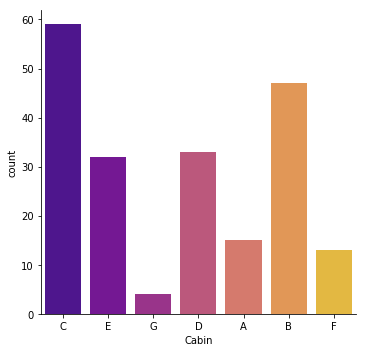

In [89]:
#Remove T cabin by redfining where T is not included

cabin_df = cabin_df[cabin_df.Cabin !='T']

sns.catplot('Cabin',data=cabin_df, kind='count',palette='plasma')

In [90]:
#Above is a box plot of the number of people per Cabin

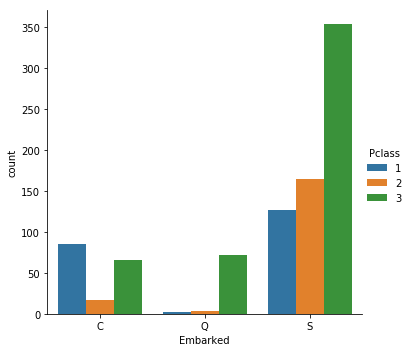

In [96]:
#Q3: Where did the passengers come from?

#Create a factor plot for class

sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count',
            order=['C','Q','S'])

In [97]:
#TakeAways:
#Who from what class came on from which cities? (see above)
#What is the economic of Q town because all people are 3rd class?

In [113]:
#Q4: Who was alone and who was with family?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,With Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,With Family


In [114]:
#Create a new column to find out who was alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone']

#'Alone' values of 0 mean the passanger was completely alone

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [115]:
# Look for >0 or ==0 to set alone status

# The location of the PassID in the 'Alone' column w/ >0 
# set equal to 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

In [116]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


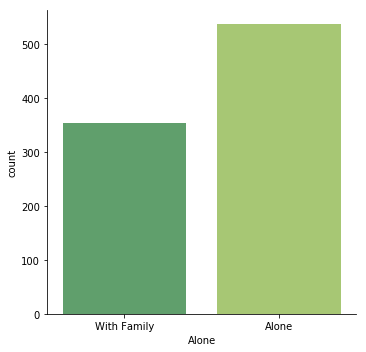

In [120]:
#Total Count of the 'Alone' column

sns.catplot(x='Alone',data=titanic_df,palette='summer',kind='count')

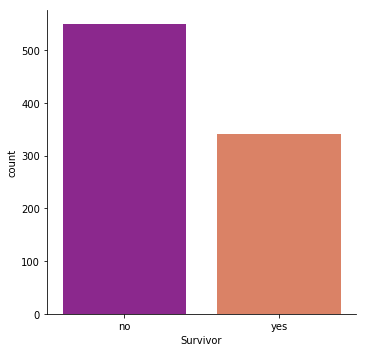

In [122]:
# What factors helped someone from sinking on the titanic?

# Create a new column [Survivor] and grabs info from Survived column in dataframe

titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

# Count of survied vs died. 
sns.catplot(x='Survivor',data=titanic_df,kind='count',palette='plasma')

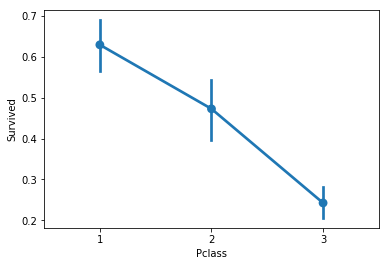

In [127]:
#What factors have an effect on survival rates?

# Let's look at class and see if that was a factor
# % survived per class

#Create a pointplot
sns.pointplot(x='Pclass',y='Survived',data=titanic_df)

In [128]:
#Takeaways:
# Survival rates for the 3rd class is substationally lower
# 3rd class had way more males than women/kids so that could be the reason why the 3rd class survival rate was lower
# This doesn't prove that 3rd class had a lower survival rate than 1st class
# Need to look at the survival rate per sex per class

In [130]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


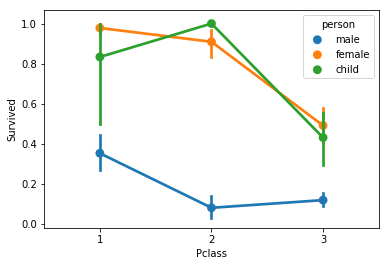

In [131]:
# % of survived per sex per class

sns.pointplot(x='Pclass',y='Survived', hue='person', data=titanic_df)

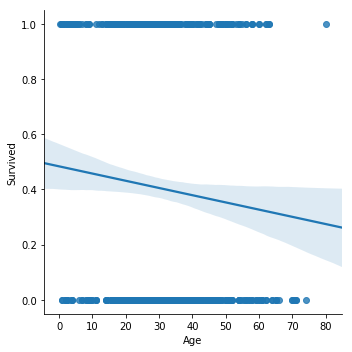

In [137]:
# Is age a factor in survival?

sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [138]:
#Bottom line are passengers who did not survive and top are passengers who did

# key takeaway
# The older the customer passenger was the less likely they survived

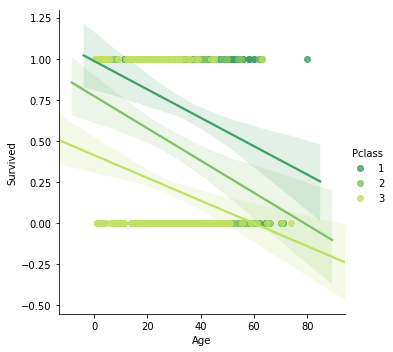

In [141]:
#See the impact of class and age

sns.lmplot(x='Age',y='Survived', hue='Pclass',palette='summer',data=titanic_df)

In [142]:
# Takeaways
# More deaths in the lower class

In [143]:
#Creating age pins to find the generations
#use a linear plot on age versus survival using hue for class seperation

generations = [10,20,40,60,80]

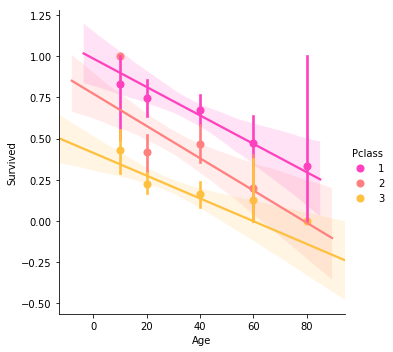

In [145]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='spring'
          ,x_bins=generations)

In [146]:
# Takeaway:
# There was less survival because of the age of the passenger, even in 1st class older folks


In [147]:
#What about if we relate gender and age with the survival set?

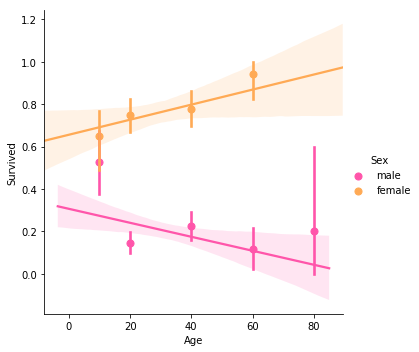

In [153]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='spring',
          x_bins = generations)

In [154]:
#Key takeaways
# Older females had a greater chance of surival than an older male

In [155]:
#Additional Questions to answer
#1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
#2.) Did having a family member increase the odds of surviving the crash?

In [156]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')